In [1]:
# library imports
from urllib.request import urlopen
from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.graph_objects as go
import json
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.io as pio
import geopandas as gpd
import seaborn as sns
from Preprocessing import Preprocessing

In [2]:
#df_movement = pd.read_csv('C:\\Users\\panzhang\\Downloads\\Mobiliteit__persoonskenmerken_20102022_134103.csv',delimiter='\t')

filename = 'Mobiliteit__persoonskenmerken_20102022_134103.csv'
delimiter = '\t'
df_movement = Preprocessing.load_data_csv(filename, delimiter)

df_movement['Per']=df_movement['Per'].str.replace('Gestandaardiseerd inkomen:','')
df_movement['Per']=df_movement['Per'].str.replace('20%-groep','')
df_movement['Verplaatsingen']=df_movement['Verplaatsingen'].str.replace(',','.').astype(float)
df_movement['Afstand']=df_movement['Afstand'].str.replace(',','.').astype(float)
df_movement['Reisduur']=df_movement['Reisduur'].str.replace(',','.').astype(float)
df_movement.head(20)


-- loading dataset ...
-- found file 
-- done


,Populatie,Geslacht,Per,Vervoerwijzen,Marges,Perioden,Regio's,Verplaatsingen,Afstand,Reisduur
0,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,1e,Totaal,Waarde,2018,Nederland,2.45,26.40,67.79
1,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,1e,Totaal,Waarde,2019,Nederland,2.30,25.09,67.00
2,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,1e,Totaal,Waarde,2020,Nederland,1.88,16.47,51.82
3,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,1e,Totaal,Waarde,2021,Nederland,2.07,18.80,61.56
4,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,1e,Personenauto,Waarde,2018,Nederland,0.55,9.24,13.70
5,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,1e,Personenauto,Waarde,2019,Nederland,0.47,7.96,12.15
6,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,1e,Personenauto,Waarde,2020,Nederland,0.40,6.17,9.63
7,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,1e,Personenauto,Waarde,2021,Nederland,0.42,6.28,9.77
8,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,1e,Personenauto,Waarde,2018,Nederland,0.24,5.04,7.42
9,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,1e,Personenauto,Waarde,2019,Nederland,0.25,5.18,8.07


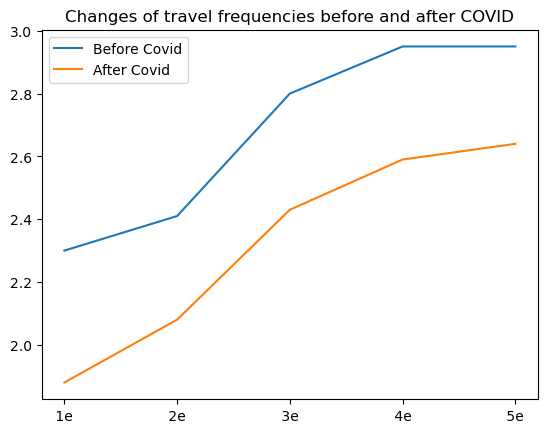

In [3]:
# Visiualization total movement before and after Covid
df_2019=df_movement[df_movement['Perioden']==2019]
df_2019_total=df_2019[df_2019['Vervoerwijzen']=='Totaal']
df_2020=df_movement[df_movement['Perioden']==2020]
df_2020_total=df_2020[df_2020['Vervoerwijzen']=='Totaal']


plt.plot(df_2019_total['Per'], df_2019_total['Verplaatsingen'],label = "Before Covid")
plt.plot(df_2020_total['Per'], df_2020_total['Verplaatsingen'],label = "After Covid")
plt.title('Changes of travel frequencies before and after COVID')
plt.legend()
plt.show()



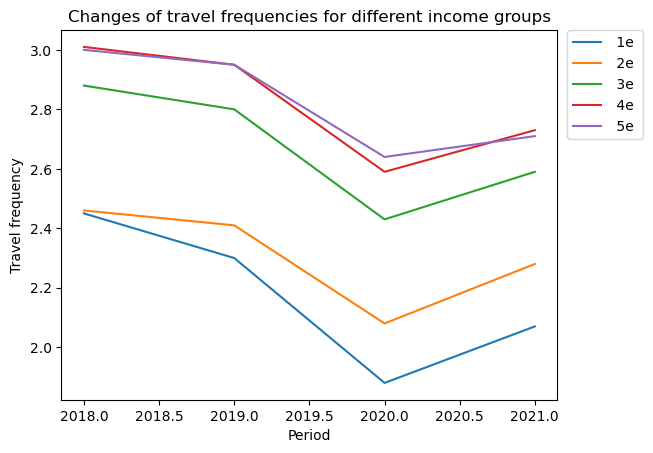

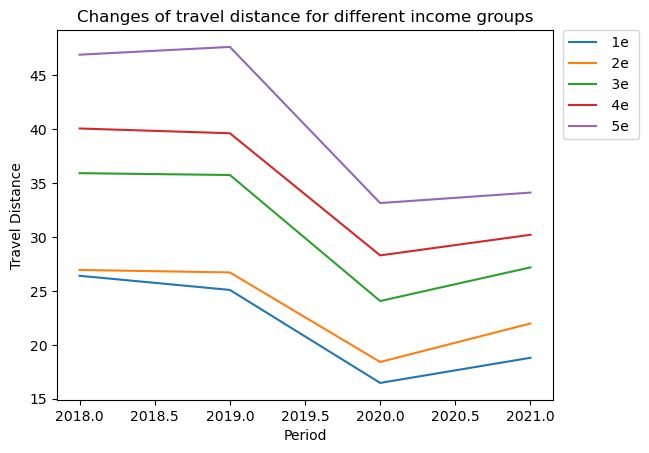

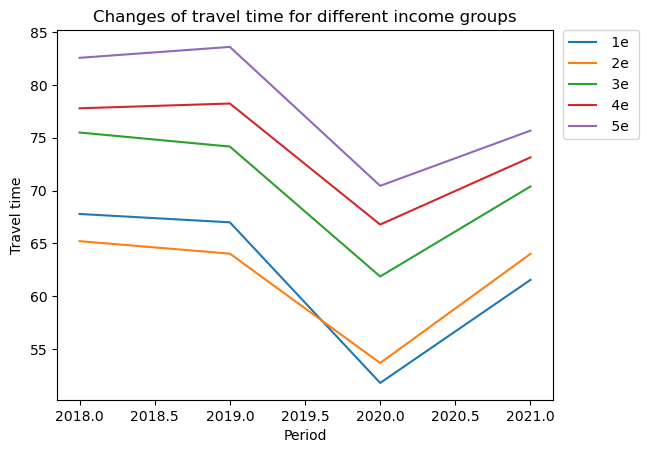

In [4]:
# Visiualization of total movement for differnet income groups

from matplotlib.pyplot import title


df_total=df_movement[df_movement['Vervoerwijzen']=='Totaal']

sns.lineplot(x='Perioden', y='Verplaatsingen', data=df_total, hue='Per').set(title='Changes of travel frequencies for different income groups')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Period')
plt.ylabel('Travel frequency')
plt.show()

sns.lineplot(x='Perioden', y='Afstand', data=df_total, hue='Per').set(title='Changes of travel distance for different income groups')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Period')
plt.ylabel('Travel Distance')
plt.show()

sns.lineplot(x='Perioden', y='Reisduur', data=df_total, hue='Per').set(title='Changes of travel time for different income groups')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Period')
plt.ylabel('Travel time')
plt.show()

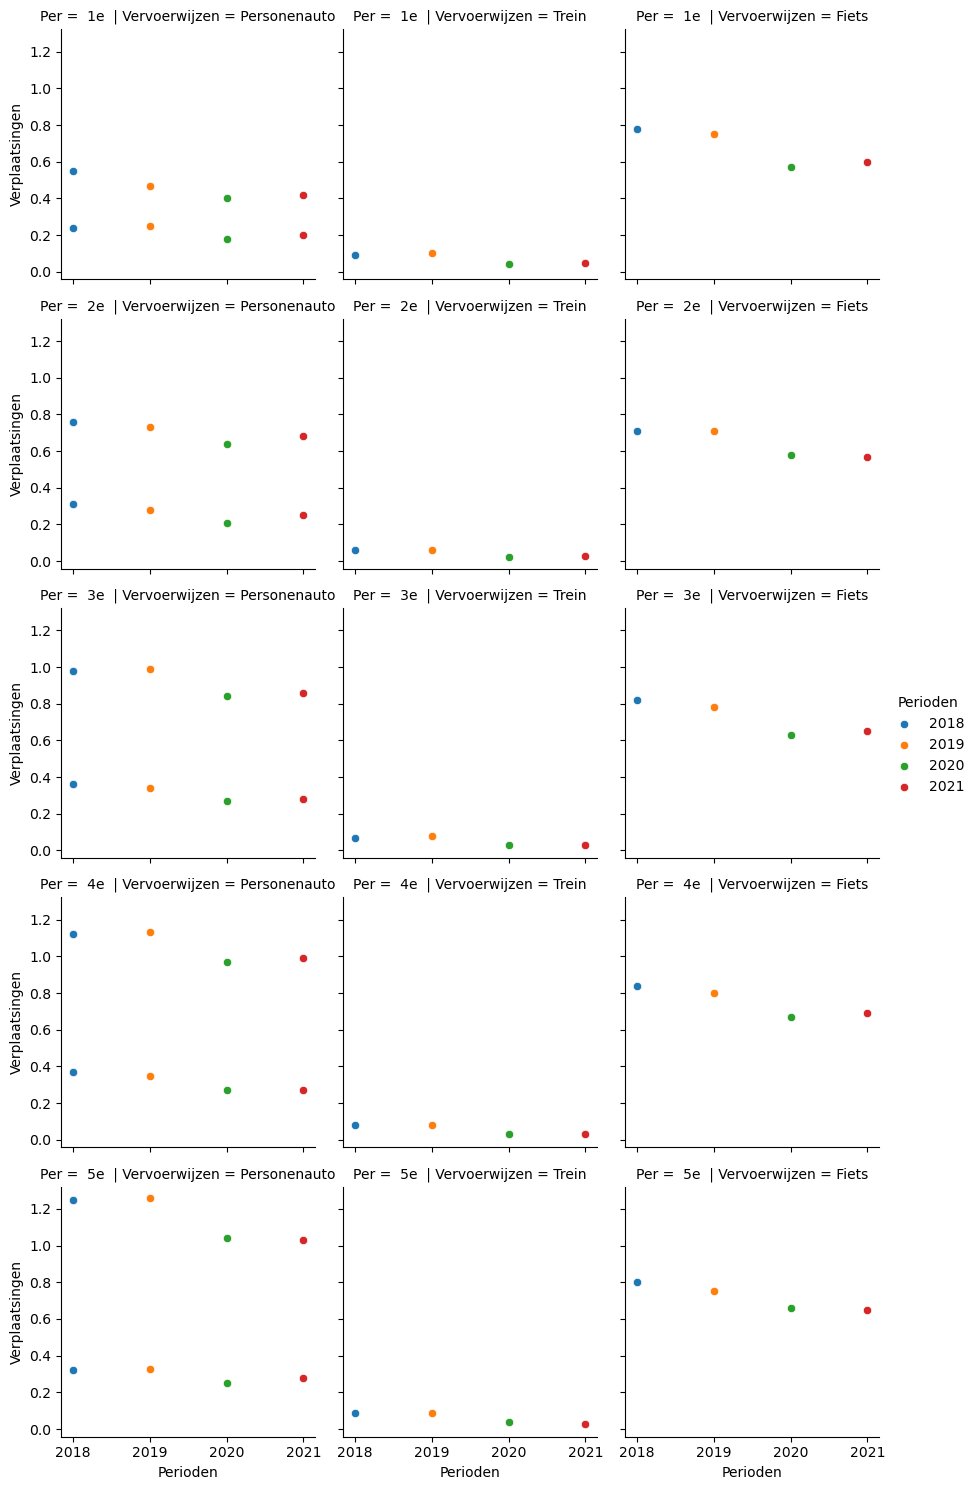

In [5]:

data_Verplaatsingen= df_movement[['Per', 'Vervoerwijzen','Perioden','Verplaatsingen']]
data_Verplaatsingen=data_Verplaatsingen[data_Verplaatsingen['Vervoerwijzen']!='Totaal']
g = sns.FacetGrid(data_Verplaatsingen, col='Vervoerwijzen',row='Per', hue='Perioden')
g.map(sns.scatterplot,'Perioden','Verplaatsingen')
g.add_legend()
plt.show()

In [6]:

fig = px.scatter(df_movement, x="Per", y="Verplaatsingen", animation_frame="Perioden",animation_group="Vervoerwijzen",
            size="Verplaatsingen",color='Per',hover_name="Per",symbol='Vervoerwijzen')

fig.show()